In [1]:
import pandas as pd
import numpy as np
import logging
from scipy import stats
from io import StringIO
import logging

In [2]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.modelo_360.nodes as model_360
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Create a string buffer to capture log output
log_capture_string = StringIO()
ch = logging.StreamHandler(log_capture_string)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

In [5]:
%load_ext kedro.ipython

[02/26/25 18:48:56] INFO     Resolved project path as:                                              ]8;id=793956;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=850951;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/26/25 18:48:56] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=186729;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=678166;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[02/26/25 18:48:57] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=393545;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=196086;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/google/auth/_default.py:76: UserWarning: Your application has                 
                             authenticated using end user credentials from Google Cloud SDK without                
                             a quota project. You might receive a "quota exceeded" or "API not                     
                             enabled" error. See the following page for troubleshooting:                           
                             https://cloud.google.com/docs/authentication/adc-troubleshooting/user-                
                             creds.                                                                                
                               warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)                                       
                                                                                                                   

                    WARNING  No project ID could be determined. Consider running `gcloud config set ]8;id=540631;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/google/auth/_default.py\_default.py]8;;\:]8;id=303083;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/google/auth/_default.py#711\711]8;;\
                             project` or setting the GOOGLE_CLOUD_PROJECT environment variable                     

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=402592;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=106864;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=701594;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=118125;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/google/auth/_default.py:76: UserWarning: Your application has                 
                             authenticated using end user credentials from Google Cloud SDK without                
                             a quota project. You might receive a "quota exceeded" or "API not                     
                             enabled" error. See the following page for troubleshooting:                           
                             https://cloud.google.com/docs/authentication/adc-troubleshooting/user-                
                             creds.                                                                                
                               warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)                                       
                                                                                                                   

                    WARNING  No project ID could be determined. Consider running `gcloud config set ]8;id=280897;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/google/auth/_default.py\_default.py]8;;\:]8;id=187120;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/google/auth/_default.py#711\711]8;;\
                             project` or setting the GOOGLE_CLOUD_PROJECT environment variable                     

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=286624;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=507032;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=829999;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=538717;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/google/auth/_default.py:76: UserWarning: Your application has                 
                             authenticated using end user credentials from Google Cloud SDK without                
                             a quota project. You might receive a "quota exceeded" or "API not                     
                             enabled" error. See the following page for troubleshooting:                           
                             https://cloud.google.com/docs/authentication/adc-troubleshooting/user-                
                             creds.                                                                                
                               warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)                                       
                                                                                                                   

                    WARNING  No project ID could be determined. Consider running `gcloud config set ]8;id=377595;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/google/auth/_default.py\_default.py]8;;\:]8;id=912517;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/google/auth/_default.py#711\711]8;;\
                             project` or setting the GOOGLE_CLOUD_PROJECT environment variable                     

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=229950;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=643533;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=543340;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=682515;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=471382;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=709211;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=686445;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=864256;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=428228;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=221997;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### 1. nodos

##### 1.1 Cargar bases, normaliza y concatena

In [7]:
# Python function that loads a parquet from a path
def load_parquet(path):
    return pd.read_parquet(path)

# Python function that loads csv from a path
def load_csv(path):
    return pd.read_csv(path)

## Backtesting Modelo 360

In [10]:
ruta = 's3://data-bbog-dev-sandbox-entity/casos-uso/fabrica-personas/modelo_360'
archivo = 'campana_full_202412_v2_adj.parquet'

In [11]:
modelo_360 = load_parquet(f'{ruta}/{archivo}')
modelo_360.head(4)

,hashvalue1,DEFINIT,probabilidad_1,probabilidad_2,probabilidad_3,probabilidad_4,probabilidad_5,probabilidad_6,probabilidad_7,probabilidad_8,...,decil_6,decil_7,decil_8,decil_9,decil_10,decil_11,Probabilidad_Combinada,region,decil_ingreso,categoria
0,CC39792347,C39792347,7.098661,3.939478,3.548277,1.771831,1.360815,1.336878,1.220266,0.442442,...,10.0,10.0,10.0,10.0,10.0,3.0,10,Region_Central,10.0,3.0
1,CC1016039750,C1016039750,13.963204,11.154443,10.258909,9.106966,4.977487,2.683136,1.382907,1.259314,...,10.0,10.0,10.0,10.0,10.0,3.0,10,Region_Central,9.0,2.0
2,CC52168604,C52168604,13.724427,9.364744,9.116254,4.401172,1.318743,1.267157,0.409835,0.311278,...,10.0,10.0,10.0,10.0,10.0,4.0,10,Region_Central,10.0,3.0
3,CC80423193,C80423193,10.465453,9.471394,4.938506,3.014308,2.898308,1.449726,1.376706,1.319073,...,10.0,10.0,10.0,10.0,10.0,10.0,10,Region_Central,10.0,3.0


#### DISTRIBUCION DE PRODUCTOS/PROPENSION

In [19]:
pastel = pd.DataFrame()
all_prods = []
for i in range(1,15,1):
    col = f'propension_{i}'
    prod = f'producto_{i}'
    if col in modelo_360.columns:
        temp = modelo_360[[prod,col]].copy()
        all_prods = list(set(all_prods+temp[prod].tolist()))
        # Crear una nueva columna que combine las dos columnas
        temp.loc[:,'combinacion'] = temp.loc[:,prod].astype(str) + ': ' + temp.loc[:,col].astype(str)
        
        # Contar los duplicados de la combinación
        duplicados = temp.groupby('combinacion').size().reset_index(name=prod).set_index('combinacion')#.rename(columns = {'combinacion':prod})
        pastel = pd.concat([pastel,duplicados], axis = 1)
display(all_prods)
#pastel.head(3)

['AH', 'TC', 'LIBRANZA', 'CDT', 'LD', None, 'SP', 'RETANQUEO', 'CS', 'CC', 'FID', 'VIV', 'VEH']

In [23]:
all_prods#.remove(None)

['AH', 'TC', 'LIBRANZA', 'CDT', 'LD', 'SP', 'RETANQUEO', 'CS', 'CC', 'FID', 'VIV', 'VEH']

In [20]:
def conteos(pastel,nominal,propensiones):
    view_all = pd.DataFrame()
    view_all_prod = pd.DataFrame()
    for col in propensiones:
        deseo_ver = []
        index_prod = []
        for prod in all_prods:
            deseo_ver.append(prod+': '+col)
            index_prod.append(prod)
        view = pastel.loc[deseo_ver].copy()
        view = view.T.dropna(how = 'all').T
        if nominal == True:
            pass
        else:
            view = view / modelo_360.shape[0]
            view = (view*100).round(3)
        view_2 = view.sum(axis = 1).to_frame().rename(columns = {0:col})
        view_2.index = index_prod
        view_all_prod = pd.concat([view_all_prod,view_2],axis = 1)
        view = view.sort_values(ascending=False, by = 'producto_1')
        view1 = view.sum().to_frame().rename(columns={0:'Total'}).T
        view = pd.concat([view1,view], axis = 0)
        view1.index = [col]
        view_all = pd.concat([view_all,view1], axis = 0)
        display(view)
    return view_all,view_all_prod

**Distribucion en valores totales:**

In [24]:
view_all,view_all_prod = conteos(pastel,True,['Muy Alto','Alto'])

,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Total,1544536.0,890361.0,702315.0,525426.0,378762.0,245785.0,145030.0,79844.0,36298.0,10333.0,579.0
AH: Muy Alto,365969.0,43228.0,4086.0,883.0,253.0,53.0,7.0,NaN,NaN,NaN,NaN
CC: Muy Alto,243400.0,114210.0,37089.0,14242.0,4203.0,1075.0,222.0,37.0,1.0,NaN,NaN
VIV: Muy Alto,240413.0,96021.0,45443.0,21642.0,8078.0,2237.0,548.0,82.0,14.0,1.0,NaN
VEH: Muy Alto,205116.0,118705.0,61257.0,22884.0,5474.0,892.0,128.0,20.0,3.0,NaN,NaN
SP: Muy Alto,94292.0,44887.0,53116.0,69688.0,73372.0,48171.0,21094.0,7321.0,2119.0,390.0,29.0
CDT: Muy Alto,87237.0,66082.0,67556.0,57645.0,44860.0,34648.0,26479.0,18623.0,8861.0,2315.0,173.0
TC: Muy Alto,73130.0,53350.0,67991.0,75665.0,65923.0,42759.0,23612.0,9401.0,2305.0,327.0,16.0
LIBRANZA: Muy Alto,66939.0,86587.0,93341.0,61189.0,26419.0,11966.0,5468.0,2377.0,685.0,135.0,16.0
LD: Muy Alto,53708.0,177181.0,113211.0,39390.0,18871.0,8714.0,2871.0,474.0,52.0,7.0,NaN


,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Total,774156.0,735649.0,817031.0,701411.0,550973.0,406370.0,278206.0,168307.0,89588.0,35158.0,2420.0
CC: Alto,275156.0,102772.0,26604.0,7677.0,1800.0,373.0,87.0,8.0,2.0,NaN,NaN
VIV: Alto,232928.0,113709.0,44005.0,16855.0,5321.0,1373.0,237.0,44.0,7.0,NaN,NaN
AH: Alto,183482.0,146683.0,60306.0,16414.0,4901.0,1802.0,691.0,173.0,25.0,2.0,NaN
LD: Alto,42657.0,160858.0,126913.0,44589.0,22763.0,11214.0,4302.0,941.0,215.0,25.0,2.0
VEH: Alto,12878.0,73448.0,146697.0,104261.0,47978.0,19324.0,7219.0,2175.0,445.0,54.0,NaN
CS: Alto,11222.0,41172.0,88753.0,101299.0,76459.0,49630.0,28915.0,12347.0,3861.0,762.0,59.0
LIBRANZA: Alto,8836.0,38495.0,97145.0,105397.0,52761.0,32155.0,19031.0,10479.0,4260.0,1079.0,109.0
FID: Alto,2761.0,22483.0,107634.0,78541.0,66175.0,49466.0,37987.0,27753.0,15784.0,5553.0,342.0
TC: Alto,1519.0,13101.0,44612.0,79497.0,89586.0,76694.0,55540.0,33423.0,15796.0,4497.0,214.0


In [25]:
view_all

,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Muy Alto,1544536.0,890361.0,702315.0,525426.0,378762.0,245785.0,145030.0,79844.0,36298.0,10333.0,579.0
Alto,774156.0,735649.0,817031.0,701411.0,550973.0,406370.0,278206.0,168307.0,89588.0,35158.0,2420.0


In [26]:
view_all_prod.cumsum(axis = 1)

,Muy Alto,Alto
AH,414479.0,828958.0
TC,414479.0,828958.0
LIBRANZA,355122.0,724869.0
CDT,414479.0,828958.0
LD,414479.0,828958.0
SP,414479.0,828958.0
RETANQUEO,59357.0,104089.0
CS,414479.0,828958.0
CC,414479.0,828958.0
FID,414479.0,828958.0


**Distribucion en porcentaje:**

- Valores ya multiplicados por 100

In [27]:
view_all,view_all_prod = conteos(pastel,False,['Muy Alto','Alto'])

,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Total,36.574,21.083,16.630,12.441,8.969,5.817,3.433,1.889,0.859,0.245,0.013
AH: Muy Alto,8.666,1.024,0.097,0.021,0.006,0.001,0.000,NaN,NaN,NaN,NaN
CC: Muy Alto,5.763,2.704,0.878,0.337,0.100,0.025,0.005,0.001,0.000,NaN,NaN
VIV: Muy Alto,5.693,2.274,1.076,0.512,0.191,0.053,0.013,0.002,0.000,0.000,NaN
VEH: Muy Alto,4.857,2.811,1.450,0.542,0.130,0.021,0.003,0.000,0.000,NaN,NaN
SP: Muy Alto,2.233,1.063,1.258,1.650,1.737,1.141,0.499,0.173,0.050,0.009,0.001
CDT: Muy Alto,2.066,1.565,1.600,1.365,1.062,0.820,0.627,0.441,0.210,0.055,0.004
TC: Muy Alto,1.732,1.263,1.610,1.792,1.561,1.012,0.559,0.223,0.055,0.008,0.000
LIBRANZA: Muy Alto,1.585,2.050,2.210,1.449,0.626,0.283,0.129,0.056,0.016,0.003,0.000
LD: Muy Alto,1.272,4.195,2.681,0.933,0.447,0.206,0.068,0.011,0.001,0.000,NaN


,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Total,18.330,17.417,19.347,16.610,13.046,9.623,6.588,3.984,2.121,0.833,0.057
CC: Alto,6.515,2.433,0.630,0.182,0.043,0.009,0.002,0.000,0.000,NaN,NaN
VIV: Alto,5.515,2.692,1.042,0.399,0.126,0.033,0.006,0.001,0.000,NaN,NaN
AH: Alto,4.345,3.473,1.428,0.389,0.116,0.043,0.016,0.004,0.001,0.000,NaN
LD: Alto,1.010,3.809,3.005,1.056,0.539,0.266,0.102,0.022,0.005,0.001,0.000
VEH: Alto,0.305,1.739,3.474,2.469,1.136,0.458,0.171,0.052,0.011,0.001,NaN
CS: Alto,0.266,0.975,2.102,2.399,1.810,1.175,0.685,0.292,0.091,0.018,0.001
LIBRANZA: Alto,0.209,0.911,2.300,2.496,1.249,0.761,0.451,0.248,0.101,0.026,0.003
FID: Alto,0.065,0.532,2.549,1.860,1.567,1.171,0.899,0.657,0.374,0.131,0.008
TC: Alto,0.036,0.310,1.056,1.882,2.121,1.816,1.315,0.791,0.374,0.106,0.005


In [28]:
view_all

,producto_1,producto_2,producto_3,producto_4,producto_5,producto_6,producto_7,producto_8,producto_9,producto_10,producto_11
Muy Alto,36.574,21.083,16.630,12.441,8.969,5.817,3.433,1.889,0.859,0.245,0.013
Alto,18.330,17.417,19.347,16.610,13.046,9.623,6.588,3.984,2.121,0.833,0.057


In [29]:
view_all_prod.cumsum(axis = 1)

,Muy Alto,Alto
AH,9.815,19.630
TC,9.815,19.627
LIBRANZA,8.407,17.162
CDT,9.815,19.629
LD,9.814,19.629
SP,9.814,19.627
RETANQUEO,1.405,2.466
CS,9.813,19.627
CC,9.813,19.627
FID,9.814,19.627


#### DISTRIBUCION DE PROPENSION POR PRODUCTO VS APERTURAS REALES

In [30]:
all_prods_homolog = {
'LIBRANZA':'lib_cant_aper_mes',
'TC':'tc_cant_aper_mes',
'LD':'ld_cant_aper_mes',
'CS':'cs_cant_aper_mes',
'SP':'sus_cant_aper_mes',
'VIV':'viv_cant_aper_mes',
'AH':'ah_cant_aper_mes',
'FID':'fid_cant_aper_mes',
'RETANQUEO':'lib_cant_aper_mes',
'VEH':'veh_cant_aper_mes',
'CC':'cc_cant_aper_mes',
'CDT':'cdt_cant_aper_mes'
    }

In [31]:
archivo_real = 's3://data-bbog-dev-refined/estandarizado/feature-store/599-persona-natural/feature-store_599-persona-natural_master-table-599_cds_m202501/'

In [32]:
df_real = load_parquet(archivo_real)

In [33]:
archivo_real2 = 's3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/BigQuery/feature_personas_m202501.parquet'

In [ ]:
df_real2 = load_parquet(archivo_real2)

In [ ]:
variables_revisar = []
ordenamiento_prod = []
for i in range(1,15,1):
    col = f'propension_{i}'
    prod = f'producto_{i}'
    if col in modelo_360.columns:
        variables_revisar.append([prod,col])
        ordenamiento_prod.append(prod)
variables_revisar


[
    ['producto_1', 'propension_1'],
    ['producto_2', 'propension_2'],
    ['producto_3', 'propension_3'],
    ['producto_4', 'propension_4'],
    ['producto_5', 'propension_5'],
    ['producto_6', 'propension_6'],
    ['producto_7', 'propension_7'],
    ['producto_8', 'propension_8'],
    ['producto_9', 'propension_9'],
    ['producto_10', 'propension_10'],
    ['producto_11', 'propension_11']
]

In [ ]:
resumen_all = pd.DataFrame()
for level,producto in enumerate(all_prods):
    variable_target = all_prods_homolog[producto]
    print(producto,': ',variable_target, f'{level} de {len(all_prods)}')
    try:
        df_real[variable_target.split('_')[0]+'_id'] = (df_real[variable_target]>0).astype(int)
        trues = df_real[variable_target.split('_')[0]+'_id'].sum() # verdaderos
        df_real_temp = df_real.copy()
    except:
        df_real2[variable_target.split('_')[0]+'_id'] = (df_real2[variable_target]>0).astype(int)
        trues = df_real2[variable_target.split('_')[0]+'_id'].sum() # verdaderos
        df_real_temp = df_real2.copy()
    for propension in ['Muy Alto','Alto','Medio Alto']:
        resumen = pd.DataFrame()
        for col,segm in variables_revisar:
            archivo_temp = modelo_360[[params['id'],col,segm]]
            archivo_temp_filt = archivo_temp[archivo_temp[col]==producto]
            archivo_temp_filt = archivo_temp_filt[archivo_temp_filt[segm]==propension]
            archivo_temp_filt = pd.merge(archivo_temp_filt,df_real_temp[[params['id'],variable_target.split('_')[0]+'_id']], on = params['id'], how = 'left')
            contactos = archivo_temp_filt.shape[0]
            nulos = archivo_temp_filt[variable_target.split('_')[0]+'_id'].isnull().sum()
            true_positive = archivo_temp_filt[variable_target.split('_')[0]+'_id'].sum()
            res = pd.DataFrame([trues,true_positive,contactos,nulos,col,propension,producto], index = ['Aperturas','TP','Contactos','Nulos','Columna 360','Propension','Producto']).T
            resumen = pd.concat([resumen,res], axis = 0)
        resumen_all = pd.concat([resumen,resumen_all], axis = 0)

AH :  ah_cant_aper_mes 0 de 12
TC :  tc_cant_aper_mes 1 de 12
LIBRANZA :  lib_cant_aper_mes 2 de 12
CDT :  cdt_cant_aper_mes 3 de 12
LD :  ld_cant_aper_mes 4 de 12
SP :  sus_cant_aper_mes 5 de 12
RETANQUEO :  lib_cant_aper_mes 6 de 12
CS :  cs_cant_aper_mes 7 de 12
CC :  cc_cant_aper_mes 8 de 12
FID :  fid_cant_aper_mes 9 de 12
VIV :  viv_cant_aper_mes 10 de 12
VEH :  veh_cant_aper_mes 11 de 12


In [38]:
resumen_aperturas = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='Aperturas')
resumen_aperturas['Total'] = resumen_aperturas['producto_1']
resumen_aperturas = resumen_aperturas[['Total']+ordenamiento_prod]
#resumen_aperturas = pd.concat([resumen_aperturas.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_aperturas], axis = 1)

resumen_tp = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='TP') 
resumen_tp = pd.concat([resumen_tp.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_tp], axis = 1)

resumen_Contactos = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='Contactos') 
resumen_Contactos = pd.concat([resumen_Contactos.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_Contactos], axis = 1)

resumen_nulos = resumen_all.pivot(index=['Producto','Propension'], columns = 'Columna 360',values='Nulos') 
resumen_nulos = pd.concat([resumen_nulos.sum(axis=1).to_frame().rename(columns = {0:'Total'}),resumen_nulos], axis = 1)


**Conteo de clientes con pronosticos y sin resultado de apertura**

- Pronosticos de clientes que ya no aparecen en la base de la 599.

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

resumen_nulos2 = resumen_nulos[ordenamiento_prod].copy()
for col in ['Muy Alto','Alto','Medio Alto']:
    resumen_nulos2_filt = resumen_nulos2.xs(key=col, level = 'Propension')
    resumen_nulos2_filt = resumen_nulos2_filt.replace(0,np.nan).T.dropna(how = 'all').T
    resumen_nulos2_filt = resumen_nulos2_filt.round(2)
    plt.figure(figsize=(15,4))
    plt.title(f'Numero de clientes no encontrados en el backtesting para el Segmento: {col}')
    sns.heatmap(resumen_nulos2_filt, annot = True, fmt = 'g',cmap='RdBu_r')
    plt.show()

**Conteo de Aciertos**

[02/26/25 19:29:42] WARNING  /tmp/ipykernel_7506/3559431979.py:5: FutureWarning: Downcasting        ]8;id=355807;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=991171;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             behavior in `replace` is deprecated and will be removed in a future                   
                             version. To retain the old behavior, explicitly call                                  
                             `result.infer_objects(copy=False)`. To opt-in to the future behavior,                 
                             set `pd.set_option('future.no_silent_downcasting', True)`                             
                               aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how =                      
                             'all').T                                                                              
                                                                                                                   

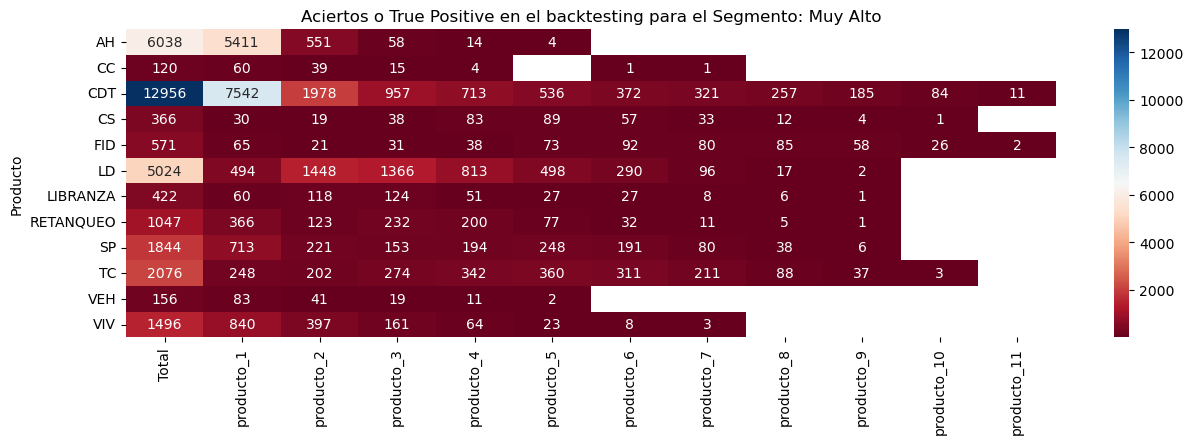

                    WARNING  /tmp/ipykernel_7506/3559431979.py:5: FutureWarning: Downcasting        ]8;id=219650;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=209899;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             behavior in `replace` is deprecated and will be removed in a future                   
                             version. To retain the old behavior, explicitly call                                  
                             `result.infer_objects(copy=False)`. To opt-in to the future behavior,                 
                             set `pd.set_option('future.no_silent_downcasting', True)`                             
                               aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how =                      
                             'all').T                                                                              
                                                                                                                   

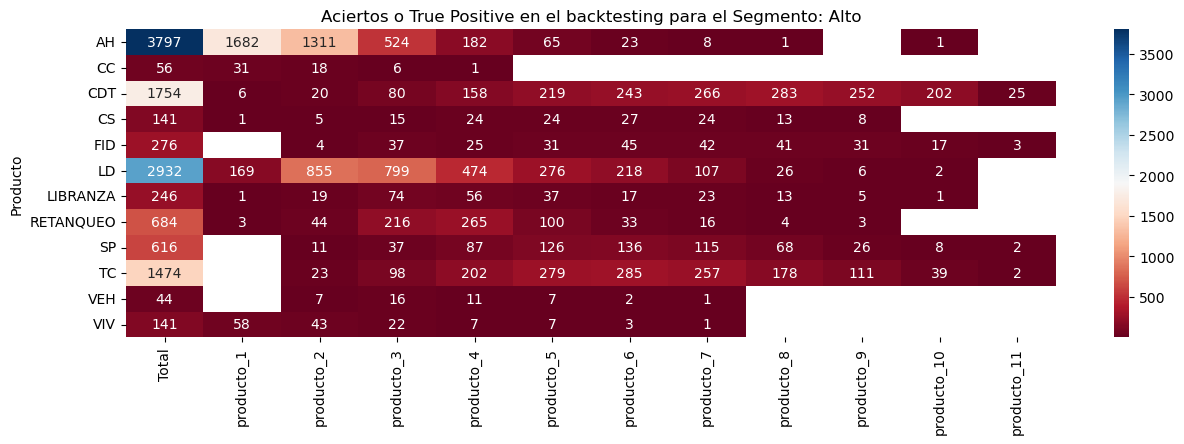

[02/26/25 19:29:43] WARNING  /tmp/ipykernel_7506/3559431979.py:5: FutureWarning: Downcasting        ]8;id=580144;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=33484;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             behavior in `replace` is deprecated and will be removed in a future                   
                             version. To retain the old behavior, explicitly call                                  
                             `result.infer_objects(copy=False)`. To opt-in to the future behavior,                 
                             set `pd.set_option('future.no_silent_downcasting', True)`                             
                               aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how =                      
                             'all').T                                                                              
                                                                                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:9                                                                                    │
│                                                                                                  │
│    6 │   #aciertos_filt = aciertos_filt.round(2)                                                 │
│    7 │   plt.figure(figsize=(15,4))                                                              │
│    8 │   plt.title(f'Aciertos o True Positive en el backtesting para el Segmento: {col}')        │
│ ❱  9 │   sns.heatmap(aciertos_filt, annot = True, fmt = 'g',cmap='RdBu')                         │
│   10 │   plt.show()                                                                              │
│   11                                                                                             │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/seaborn/matrix.py: │
│ 446 in heatmap                                                                                   │
│                                                                                                  │
│    443 │                                                                                         │
│    444 │   """                                                                                   │
│    445 │   # Initialize the plotter object                                                       │
│ ❱  446 │   plotter = _HeatMapper(data, vmin, vmax, cmap, center, robust, annot, fmt,             │
│    447 │   │   │   │   │   │     annot_kws, cbar, cbar_kws, xticklabels,                         │
│    448 │   │   │   │   │   │     yticklabels, mask)                                              │
│    449                                                                                           │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/seaborn/matrix.py: │
│ 163 in __init__                                                                                  │
│                                                                                                  │
│    160 │   │   self.ylabel = ylabel if ylabel is not None else ""                                │
│    161 │   │                                                                                     │
│    162 │   │   # Determine good default values for the colormapping                              │
│ ❱  163 │   │   self._determine_cmap_params(plot_data, vmin, vmax,                                │
│    164 │   │   │   │   │   │   │   │   │   cmap, center, robust)                                 │
│    165 │   │                                                                                     │
│    166 │   │   # Sort out the annotations                                                        │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/seaborn/matrix.py: │
│ 202 in _determine_cmap_params                                                                    │
│                                                                                                  │
│    199 │   │   │   if robust:                                                                    │
│    200 │   │   │   │   vmin = np.nanpercentile(calc_data, 2)                                     │
│    201 │   │   │   else:                                                                         │
│ ❱  202 │   │   │   │   vmin = np.nanmin(calc_data)                                               │
│    203 │   │   if vmax is None:                            

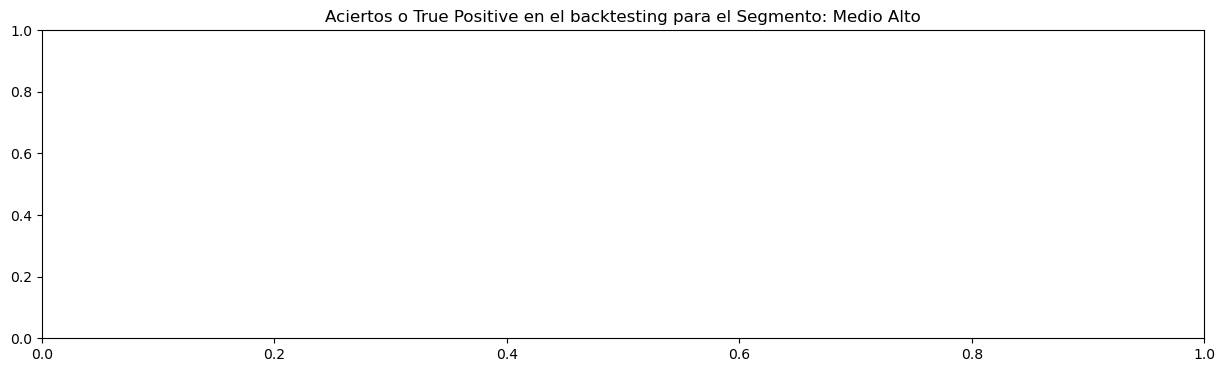

In [40]:
aciertos = resumen_tp[['Total']+ordenamiento_prod].copy()
#aciertos = pd.concat([aciertos.sum(axis=1).to_frame().rename(columns = {0:'Total'}),aciertos], axis = 1)
for col in ['Muy Alto','Alto','Medio Alto']:
    aciertos_filt = aciertos.xs(key=col, level = 'Propension').round(2)
    aciertos_filt = aciertos_filt.replace(0,np.nan).T.dropna(how = 'all').T
    #aciertos_filt = aciertos_filt.round(2)
    plt.figure(figsize=(15,4))
    plt.title(f'Aciertos o True Positive en el backtesting para el Segmento: {col}')
    sns.heatmap(aciertos_filt, annot = True, fmt = 'g',cmap='RdBu')
    plt.show()

**Conteo de % Aciertos o Recall**

- Valores multiplicados por 100 o en %

[02/26/25 19:31:34] WARNING  /tmp/ipykernel_7506/2548687745.py:1: FutureWarning: Downcasting object ]8;id=233186;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=487368;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             dtype arrays on .fillna, .ffill, .bfill is deprecated and will change                 
                             in a future version. Call result.infer_objects(copy=False) instead. To                
                             opt-in to the future behavior, set                                                    
                             `pd.set_option('future.no_silent_downcasting', True)`                                 
                               recall =                                                                            
                             (100*resumen_tp[['Total']+ordenamiento_prod]/resumen_aperturas[['Total                
                             ']+ordenamiento_prod]).fillna(np.nan).round(3)                                        
                                                                                                                   

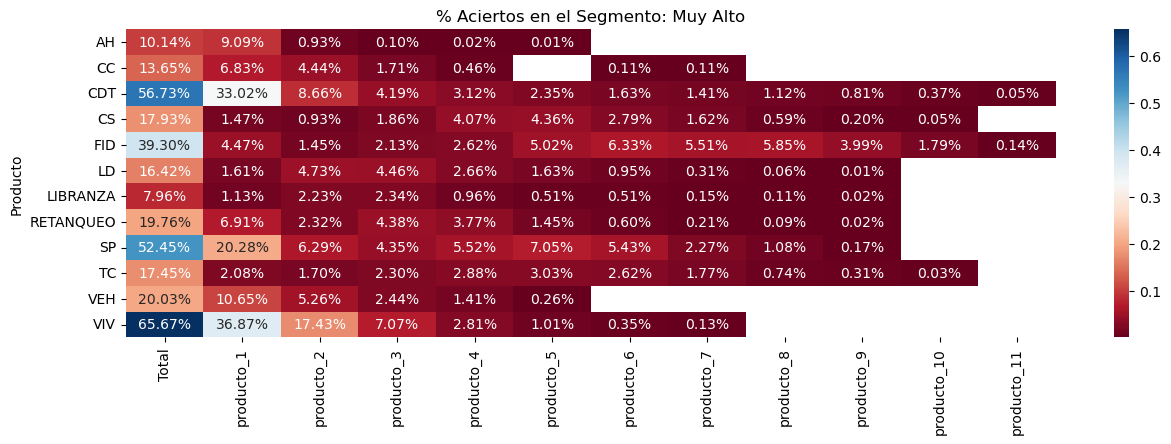

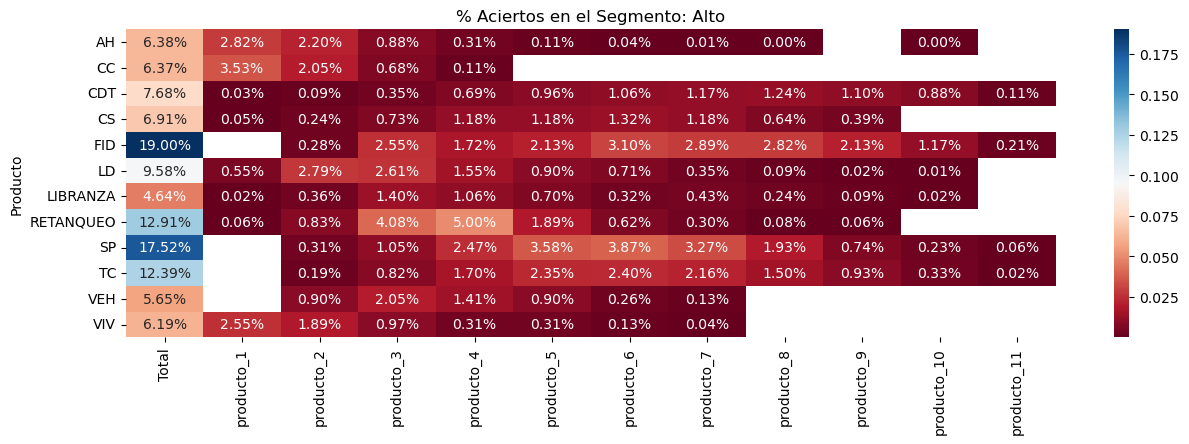

[02/26/25 19:31:35] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=52678;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=952620;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice                          
                             encountered                                                                           
                               vmin = np.nanmin(calc_data)                                                         
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=716633;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=761889;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice                          
                             encountered                                                                           
                               vmax = np.nanmax(calc_data)                                                         
                                                                                                                   

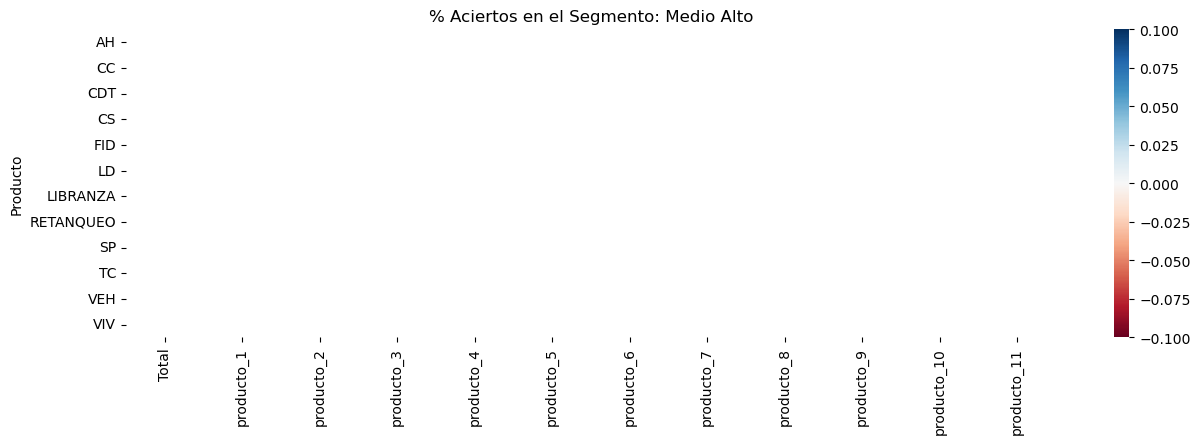

In [41]:
recall = (100*resumen_tp[['Total']+ordenamiento_prod]/resumen_aperturas[['Total']+ordenamiento_prod]).fillna(np.nan).round(3)
recall = recall.replace(0.0, np.nan)
recall = recall.reset_index()
recall['Propension'] =  pd.Categorical(recall['Propension'], categories=['Muy Alto','Alto', 'Medio Alto'])
recall.set_index(['Producto','Propension'], inplace=True)
recall = recall.sort_index()
for col in ['Muy Alto','Alto','Medio Alto']:
    recall_filt = recall.xs(key=col, level = 'Propension')/100
    #recall_filt = pd.concat([recall_filt.sum(axis=1).to_frame().rename(columns = {0:'Total'}),recall_filt], axis = 1)
    plt.figure(figsize=(15,4))
    plt.title(f'% Aciertos en el Segmento: {col}')
    sns.heatmap(recall_filt, annot = True, fmt = '0.2%',cmap='RdBu')
    plt.show()
    plt.show()
# plt.figure(figsize=(20,10))
# sns.heatmap(recall/100, annot = True, fmt = '0.2%',cmap='RdBu')
# plt.show()
# sumar por fila

**% Aciertos x Contato o Efectividad**

[02/26/25 19:31:40] INFO     Datos *100                                                              ]8;id=191507;file:///tmp/ipykernel_7506/796241907.py\796241907.py]8;;\:]8;id=145021;file:///tmp/ipykernel_7506/796241907.py#1\1]8;;\

                    WARNING  /tmp/ipykernel_7506/796241907.py:2: FutureWarning: Downcasting object  ]8;id=441848;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=981062;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             dtype arrays on .fillna, .ffill, .bfill is deprecated and will change                 
                             in a future version. Call result.infer_objects(copy=False) instead. To                
                             opt-in to the future behavior, set                                                    
                             `pd.set_option('future.no_silent_downcasting', True)`                                 
                               efect = (100*resumen_tp[['Total']+ordenamiento_prod] /                              
                             resumen_Contactos[['Total']+ordenamiento_prod]).fillna(np.nan).round(3                
                             )                                                                                     
                                                                                                                   

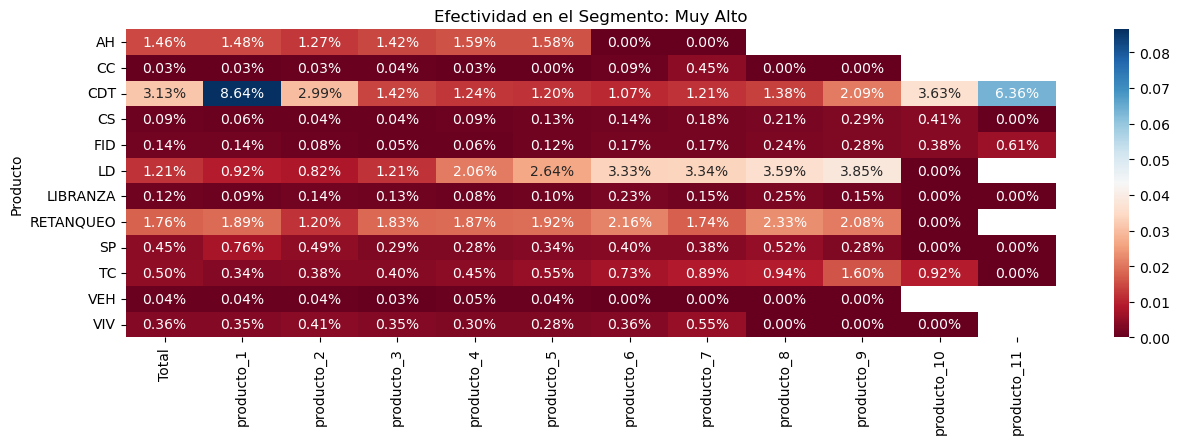

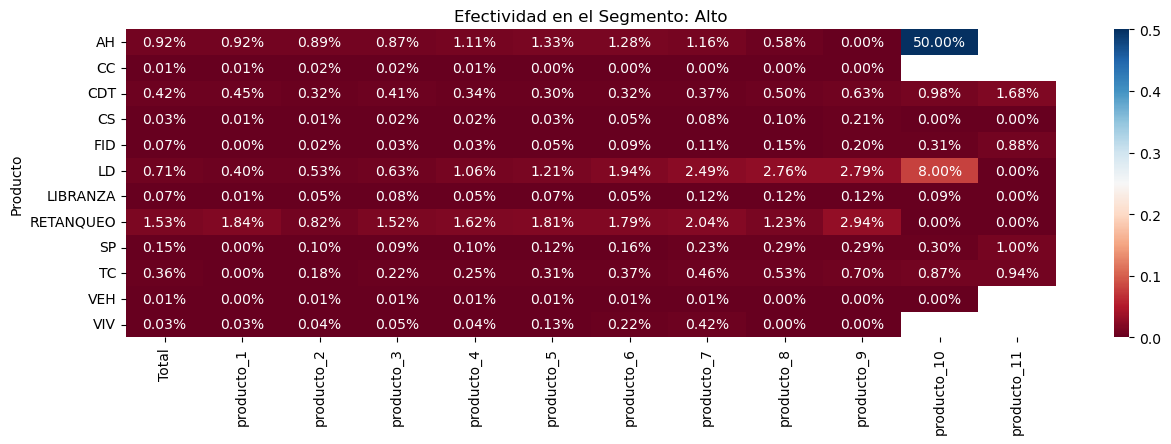

[02/26/25 19:31:41] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=605919;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=744470;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice                          
                             encountered                                                                           
                               vmin = np.nanmin(calc_data)                                                         
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=648983;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=85313;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice                          
                             encountered                                                                           
                               vmax = np.nanmax(calc_data)                                                         
                                                                                                                   

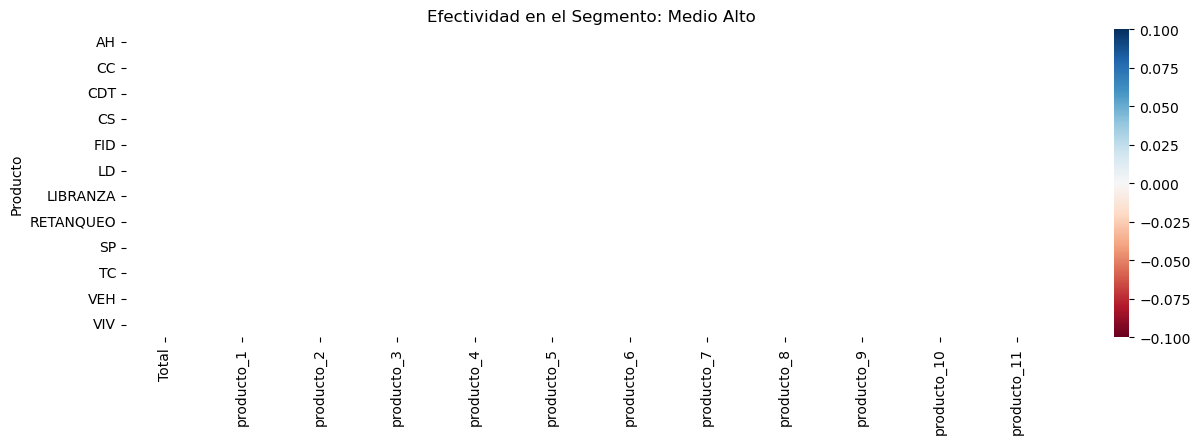

In [42]:
logger.info(f'Datos *100')
efect = (100*resumen_tp[['Total']+ordenamiento_prod] / resumen_Contactos[['Total']+ordenamiento_prod]).fillna(np.nan).round(3)
efect = efect.reset_index()
efect['Propension'] =  pd.Categorical(efect['Propension'], categories=['Muy Alto','Alto', 'Medio Alto'])
efect.set_index(['Producto','Propension'], inplace=True)
efect = efect.sort_index()
for col in ['Muy Alto','Alto','Medio Alto']:
    efect_clean_filt = efect.xs(key=col, level = 'Propension')/100
    plt.figure(figsize=(15,4))
    plt.title(f'Efectividad en el Segmento: {col}')
    sns.heatmap(efect_clean_filt, annot = True, fmt = '0.2%',cmap='RdBu')
    plt.show()
# plt.figure(figsize=(20,10))
# sns.heatmap(efect/100, annot = True, fmt = '0.2%',cmap='RdBu')
# plt.show()

**% Aciertos x Contato o Efectividad Ajustada a los clientes que si sabemos que aperturaron o no**

- Existen IDs que no se encuentran en la data real y por esta razon se ajusta el numero de contactos a los que si se encontraron. 
- Luego medimos la efectividad con los clientes en donde sabemos si finalmente se aperturo o no el producto

logger.info(f'Datos *100')
efect_clean = (100*resumen_tp[['Total']+ordenamiento_prod] / (resumen_Contactos[['Total']+ordenamiento_prod]-resumen_nulos[['Total']+ordenamiento_prod])).fillna(np.nan).round(3)
efect_clean = efect_clean.reset_index()
efect_clean['Propension'] =  pd.Categorical(efect_clean['Propension'], categories=['Muy Alto','Alto', 'Medio Alto'])
efect_clean.set_index(['Producto','Propension'], inplace=True)
efect_clean = efect_clean.sort_index()
for col in ['Muy Alto','Alto','Medio Alto']:
    efect_clean_filt = efect_clean.xs(key=col, level = 'Propension')/100
    plt.figure(figsize=(15,4))
    plt.title(f'Efectividad en el Segmento: {col}')
    sns.heatmap(efect_clean_filt, annot = True, fmt = '0.2%',cmap='RdBu')
    plt.show()
# plt.figure(figsize=(20,10))
# sns.heatmap(efect_clean/100, annot = True, fmt = '0.2%',cmap='RdBu')
# plt.show()